Importing Li

In [ ]:
import pandas as pd
import requests

In [ ]:
import sys

In [ ]:
import pandas as pd
import json
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# URLs of datasets
current_quiz_url = "https://www.jsonkeeper.com/b/LLQT"
historical_quiz_url = "https://api.jsonserve.com/XgAgFJ"

# Load JSON data from URLs
current_quiz_data = requests.get(current_quiz_url).json()
historical_quiz_data = requests.get(historical_quiz_url).json()

In [ ]:
data = pd.read_json(current_quiz_url, orient='index')


In [ ]:
data.to_csv('data.csv', index = True)

In [ ]:
df = pd.read_csv('data.csv')

In [ ]:
df

,Unnamed: 0,id,name,title,description,difficulty_level,topic,time,is_published,created_at,...,exam_id,show_unanswered,ends_at,lives,live_count,coin_count,questions_count,daily_date,max_mistake_count,questions
0,quiz,43,NaN,Structural Organisation in Animals and Plants (7),NaN,NaN,Structural Organisation in Animals,2024-07-03T00:00:00.000+05:30,True,2024-07-03 11:00:08.958000+05:30,...,NaN,False,2025-01-18,NaN,Free Test,-1,128,"January 17, 2025",15,"[{'id': 1827, 'description': 'The tissue which..."


In [ ]:
if 'questions' in df.columns:
    df.drop("questions", axis=1, inplace=True)
df.dropna(axis =1, inplace = True)
df

,Unnamed: 0,id,title,topic,time,is_published,created_at,updated_at,duration,end_time,...,is_form,show_mastery_option,is_custom,show_unanswered,ends_at,live_count,coin_count,questions_count,daily_date,max_mistake_count
0,quiz,43,Structural Organisation in Animals and Plants (7),Structural Organisation in Animals,2024-07-03T00:00:00.000+05:30,True,2024-07-03 11:00:08.958000+05:30,2024-09-23 18:43:27.751000+05:30,128,2024-07-04 00:00:00+05:30,...,False,False,False,False,2025-01-18,Free Test,-1,128,"January 17, 2025",15


In [ ]:
import pandas as pd
import ast

# Load CSV
df = pd.read_csv("data.csv")

# Parse the 'questions' column
df["questions"] = df["questions"].apply(ast.literal_eval)

# Flatten questions into rows
questions_list = []
for _, row in df.iterrows():
    for q in row["questions"]:
        q["quiz_id"] = row["id"]
        q["quiz_topic"] = row["topic"]
        questions_list.append(q)

questions_df = pd.DataFrame(questions_list)

# Analyze by topic (trivial here, but scalable for larger datasets)
topic_summary = questions_df.groupby("topic").agg(
    total_questions=("id", "count"),
    # Add metrics like 'average_correct' if response data exists
)
print(topic_summary)

                                     total_questions
topic                                               
structural organisation in animals               128


In [ ]:
h_data = pd.DataFrame(historical_quiz_data)


In [ ]:
# Convert dictionaries to strings to make them hashable
for column in h_data.columns:
    if h_data[column].apply(type).eq(dict).any():  # Check if column contains dicts
        h_data[column] = h_data[column].astype(str)

# Now you can drop duplicates
h_data = h_data.drop_duplicates()

if 'response_map' in h_data:
 h_data.drop("response_map", axis=1, inplace=True)


In [ ]:
h_data.to_csv('historical_data.csv', index = True)

Pre-Processing the data

In [ ]:
import pandas as pd
import ast

# Load the data
df = pd.read_csv('historical_data.csv')

# Improved parsing function
def parse_quiz(quiz_str):
    try:
        # Convert to proper Python dict
        return ast.literal_eval(quiz_str.replace("None", "'None'").replace("True", "'True'").replace("False", "'False'"))
    except (SyntaxError, ValueError) as e:
        print(f"Error parsing: {quiz_str[:50]}...")
        return {}

# Apply parsing
df['quiz_data'] = df['quiz'].apply(parse_quiz)

# Verify parsing
print("\nParsed quiz_data sample:")
print(df['quiz_data'].iloc[0].keys())  # Should show dict keys

# Extract fields with validation
def safe_get(data, key, default=""):
    value = data.get(key, default)
    return value.strip() if isinstance(value, str) else value

df['title'] = df['quiz_data'].apply(lambda x: safe_get(x, 'title'))
df['topic'] = df['quiz_data'].apply(lambda x: safe_get(x, 'topic'))
df['questions_count'] = df['quiz_data'].apply(lambda x: safe_get(x, 'questions_count'))



Parsed quiz_data sample:
dict_keys(['id', 'name', 'title', 'description', 'difficulty_level', 'topic', 'time', 'is_published', 'created_at', 'updated_at', 'duration', 'end_time', 'negative_marks', 'correct_answer_marks', 'shuffle', 'show_answers', 'lock_solutions', 'is_form', 'show_mastery_option', 'reading_material', 'quiz_type', 'is_custom', 'banner_id', 'exam_id', 'show_unanswered', 'ends_at', 'lives', 'live_count', 'coin_count', 'questions_count', 'daily_date', 'max_mistake_count', 'reading_materials'])


In [ ]:
if 'quiz' in df.columns and 'quiz_data' in df.columns:
    df.drop(["quiz", "quiz_data"],axis=1, inplace=True)
df.dropna(axis =1, inplace = True)

df

,Unnamed: 0,id,quiz_id,user_id,submitted_at,created_at,updated_at,score,trophy_level,accuracy,...,ended_at,duration,better_than,total_questions,rank_text,mistakes_corrected,initial_mistake_count,title,topic,questions_count
0,0,336497,51,YcDFSO4ZukTJnnFMgRNVwZTE4j42,2025-01-17T15:30:18.027+05:30,2025-01-17T15:30:18.044+05:30,2025-01-17T15:30:18.044+05:30,108,2,90 %,...,2025-01-17T15:30:15.000+05:30,15:00,107,100,Topic Rank - #-171,9,12,Human Physiology (15),Body Fluids and Circulation,100
1,1,336448,6,YcDFSO4ZukTJnnFMgRNVwZTE4j42,2025-01-17T15:17:44.042+05:30,2025-01-17T15:17:44.056+05:30,2025-01-17T15:17:44.056+05:30,92,1,100 %,...,2025-01-17T15:17:41.000+05:30,15:00,395,23,Topic Rank - #-9140,3,3,Human Physiology PYQ,Body Fluids and Circulation,23
2,2,333330,51,YcDFSO4ZukTJnnFMgRNVwZTE4j42,2025-01-16T20:13:19.682+05:30,2025-01-16T20:13:19.699+05:30,2025-01-16T20:13:19.699+05:30,116,2,96 %,...,2025-01-16T20:13:18.000+05:30,15:00,115,100,Topic Rank - #-418,11,12,Human Physiology (15),Body Fluids and Circulation,100
3,3,333242,6,YcDFSO4ZukTJnnFMgRNVwZTE4j42,2025-01-16T20:00:11.562+05:30,2025-01-16T20:00:11.573+05:30,2025-01-16T20:00:11.573+05:30,36,2,90 %,...,2025-01-16T20:00:09.000+05:30,15:00,152,23,Topic Rank - #-1598,1,2,Human Physiology PYQ,Body Fluids and Circulation,23
4,4,329504,51,YcDFSO4ZukTJnnFMgRNVwZTE4j42,2025-01-15T20:34:39.462+05:30,2025-01-15T20:34:39.478+05:30,2025-01-15T20:34:39.478+05:30,36,3,31 %,...,2025-01-15T20:34:38.000+05:30,15:00,35,100,Topic Rank - #2023,0,20,Human Physiology (15),Body Fluids and Circulation,100
5,5,328488,57,YcDFSO4ZukTJnnFMgRNVwZTE4j42,2025-01-15T15:57:12.791+05:30,2025-01-15T15:57:12.800+05:30,2025-01-15T15:57:12.800+05:30,40,3,38 %,...,2025-01-15T15:57:11.000+05:30,15:00,43,89,Topic Rank - #1810,0,16,Reproduction,Human Reproduction,89
6,6,328414,6,YcDFSO4ZukTJnnFMgRNVwZTE4j42,2025-01-15T15:36:46.410+05:30,2025-01-15T15:36:46.420+05:30,2025-01-15T15:36:46.420+05:30,36,3,50 %,...,2025-01-15T15:36:45.000+05:30,15:00,152,23,Topic Rank - #-1598,0,9,Human Physiology PYQ,Body Fluids and Circulation,23
7,7,321514,20,YcDFSO4ZukTJnnFMgRNVwZTE4j42,2025-01-13T16:10:03.743+05:30,2025-01-13T16:10:03.753+05:30,2025-01-13T16:10:03.753+05:30,12,2,30 %,...,2025-01-13T16:10:02.000+05:30,15:00,18,59,Topic Rank - #2556,0,7,PRINCIPLES OF INHERITANCE AND VARIATION PYQ,principles of inheritance and variation,59
8,8,320963,24,YcDFSO4ZukTJnnFMgRNVwZTE4j42,2025-01-13T13:28:12.784+05:30,2025-01-13T13:28:12.795+05:30,2025-01-13T13:28:12.795+05:30,76,2,100 %,...,2025-01-13T13:28:11.000+05:30,15:00,375,20,Topic Rank - #-8479,4,4,MICROBES IN HUMAN WELFARE PYQ,microbes in human welfare,20
9,9,320916,18,YcDFSO4ZukTJnnFMgRNVwZTE4j42,2025-01-13T13:12:40.687+05:30,2025-01-13T13:12:40.695+05:30,2025-01-13T13:12:40.695+05:30,40,1,100 %,...,2025-01-13T13:12:39.000+05:30,15:00,177,22,Topic Rank - #-2380,0,0,REPRODUCTIVE HEALTH PYQ,reproductive health,22


In [ ]:
# Clean numeric columns
numeric_cols = ['score', 'accuracy', 'speed', 'final_score',
               'negative_score', 'correct_answers', 'incorrect_answers']
for col in numeric_cols:
    if col in df.columns:  # Check if column exists before processing
        df[col] = df[col].replace('[%,]', '', regex=True).astype(float)
    else:
        print(f"Warning: Column '{col}' not found in DataFrame.")

# Convert date columns
df['submitted_at'] = pd.to_datetime(df['submitted_at'])

df

,Unnamed: 0,id,quiz_id,user_id,submitted_at,created_at,updated_at,score,trophy_level,accuracy,...,type,started_at,ended_at,duration,better_than,total_questions,rank_text,mistakes_corrected,initial_mistake_count,quiz
0,0,336497,51,YcDFSO4ZukTJnnFMgRNVwZTE4j42,2025-01-17 15:30:18.027000+05:30,2025-01-17T15:30:18.044+05:30,2025-01-17T15:30:18.044+05:30,108.0,2,90.0,...,topic,2025-01-17T15:18:30.000+05:30,2025-01-17T15:30:15.000+05:30,15:00,107,100,Topic Rank - #-171,9,12,"{'id': 51, 'name': None, 'title': 'Human Physi..."
1,1,336448,6,YcDFSO4ZukTJnnFMgRNVwZTE4j42,2025-01-17 15:17:44.042000+05:30,2025-01-17T15:17:44.056+05:30,2025-01-17T15:17:44.056+05:30,92.0,1,100.0,...,topic,2025-01-17T15:07:45.000+05:30,2025-01-17T15:17:41.000+05:30,15:00,395,23,Topic Rank - #-9140,3,3,"{'id': 6, 'name': None, 'title': 'Human Physio..."
2,2,333330,51,YcDFSO4ZukTJnnFMgRNVwZTE4j42,2025-01-16 20:13:19.682000+05:30,2025-01-16T20:13:19.699+05:30,2025-01-16T20:13:19.699+05:30,116.0,2,96.0,...,topic,2025-01-16T20:01:10.000+05:30,2025-01-16T20:13:18.000+05:30,15:00,115,100,Topic Rank - #-418,11,12,"{'id': 51, 'name': None, 'title': 'Human Physi..."
3,3,333242,6,YcDFSO4ZukTJnnFMgRNVwZTE4j42,2025-01-16 20:00:11.562000+05:30,2025-01-16T20:00:11.573+05:30,2025-01-16T20:00:11.573+05:30,36.0,2,90.0,...,topic,2025-01-16T19:52:57.000+05:30,2025-01-16T20:00:09.000+05:30,15:00,152,23,Topic Rank - #-1598,1,2,"{'id': 6, 'name': None, 'title': 'Human Physio..."
4,4,329504,51,YcDFSO4ZukTJnnFMgRNVwZTE4j42,2025-01-15 20:34:39.462000+05:30,2025-01-15T20:34:39.478+05:30,2025-01-15T20:34:39.478+05:30,36.0,3,31.0,...,topic,2025-01-15T20:21:25.000+05:30,2025-01-15T20:34:38.000+05:30,15:00,35,100,Topic Rank - #2023,0,20,"{'id': 51, 'name': None, 'title': 'Human Physi..."
5,5,328488,57,YcDFSO4ZukTJnnFMgRNVwZTE4j42,2025-01-15 15:57:12.791000+05:30,2025-01-15T15:57:12.800+05:30,2025-01-15T15:57:12.800+05:30,40.0,3,38.0,...,topic,2025-01-15T15:47:05.000+05:30,2025-01-15T15:57:11.000+05:30,15:00,43,89,Topic Rank - #1810,0,16,"{'id': 57, 'name': None, 'title': 'Reproductio..."
6,6,328414,6,YcDFSO4ZukTJnnFMgRNVwZTE4j42,2025-01-15 15:36:46.410000+05:30,2025-01-15T15:36:46.420+05:30,2025-01-15T15:36:46.420+05:30,36.0,3,50.0,...,topic,2025-01-15T15:23:42.000+05:30,2025-01-15T15:36:45.000+05:30,15:00,152,23,Topic Rank - #-1598,0,9,"{'id': 6, 'name': None, 'title': 'Human Physio..."
7,7,321514,20,YcDFSO4ZukTJnnFMgRNVwZTE4j42,2025-01-13 16:10:03.743000+05:30,2025-01-13T16:10:03.753+05:30,2025-01-13T16:10:03.753+05:30,12.0,2,30.0,...,topic,2025-01-13T16:05:27.000+05:30,2025-01-13T16:10:02.000+05:30,15:00,18,59,Topic Rank - #2556,0,7,"{'id': 20, 'name': None, 'title': 'PRINCIPLES ..."
8,8,320963,24,YcDFSO4ZukTJnnFMgRNVwZTE4j42,2025-01-13 13:28:12.784000+05:30,2025-01-13T13:28:12.795+05:30,2025-01-13T13:28:12.795+05:30,76.0,2,100.0,...,topic,2025-01-13T13:14:17.000+05:30,2025-01-13T13:28:11.000+05:30,15:00,375,20,Topic Rank - #-8479,4,4,"{'id': 24, 'name': None, 'title': 'MICROBES IN..."
9,9,320916,18,YcDFSO4ZukTJnnFMgRNVwZTE4j42,2025-01-13 13:12:40.687000+05:30,2025-01-13T13:12:40.695+05:30,2025-01-13T13:12:40.695+05:30,40.0,1,100.0,...,topic,2025-01-13T13:11:13.000+05:30,2025-01-13T13:12:39.000+05:30,15:00,177,22,Topic Rank - #-2380,0,0,"{'id': 18, 'name': None, 'title': 'REPRODUCTIV..."


In [ ]:
topic_analysis = df.groupby('topic').agg({
    'score': 'mean',
    'accuracy': 'mean',
    'speed': 'mean',
    'negative_score': 'mean',
    'incorrect_answers': 'sum',
    'correct_answers': 'sum'
}).reset_index()

In [ ]:
# Time-based analysis
df_sorted = df.sort_values('submitted_at')
time_trend = df_sorted.groupby([pd.Grouper(key='submitted_at', freq='M'), 'topic']).agg({
    'score': 'mean',
    'accuracy': 'mean'
}).reset_index()

<ipython-input-23-3540225c08e4>:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  time_trend = df_sorted.groupby([pd.Grouper(key='submitted_at', freq='M'), 'topic']).agg({


In [ ]:
# 3. Generate Insights
# Weak areas
weak_areas = topic_analysis.sort_values('score').head(2)[['topic', 'score', 'accuracy']]

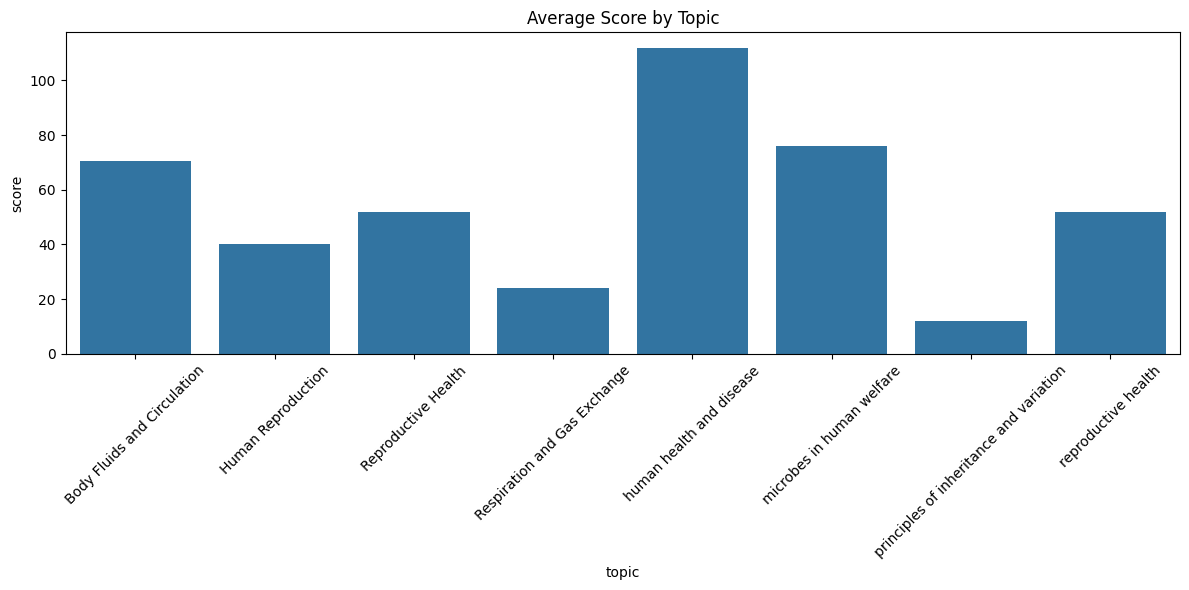

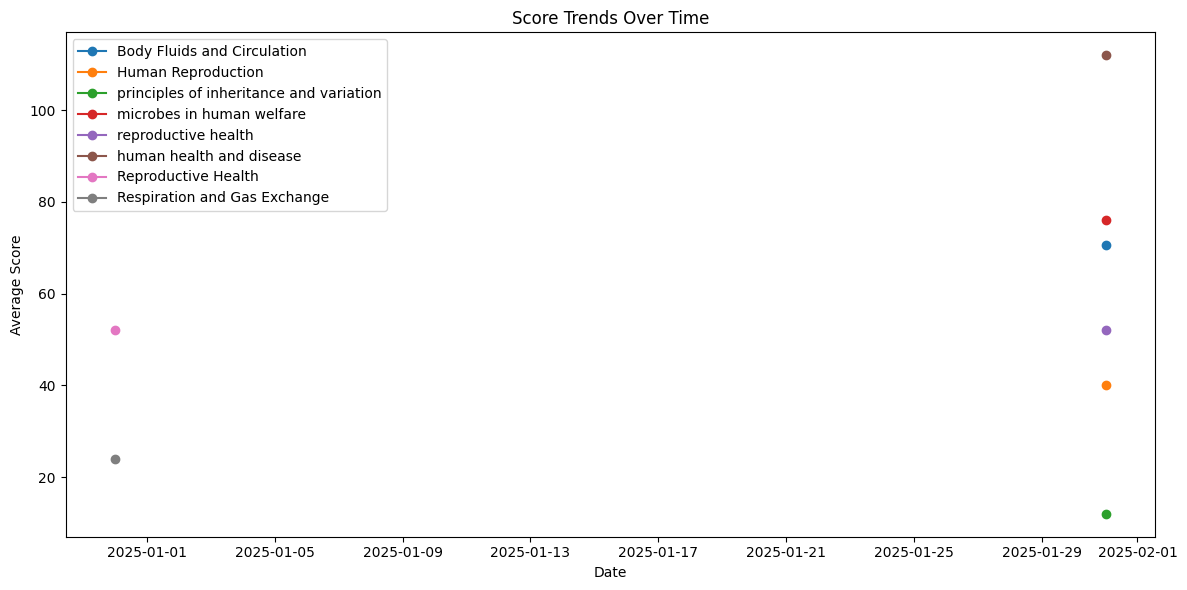

In [ ]:
# 4. Visualization
plt.figure(figsize=(12, 6))
sns.barplot(x='topic', y='score', data=topic_analysis)
plt.title('Average Score by Topic')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
for topic in df['topic'].unique():
    subset = time_trend[time_trend['topic'] == topic]
    plt.plot(subset['submitted_at'], subset['score'], label=topic, marker='o')
plt.title('Score Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Average Score')
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
import re

In [ ]:
 # Generate Recommendations
def generate_recommendations(analysis_df):
    recommendations = []

    # Weakest topic
    weak_topic = analysis_df.sort_values('score').iloc[0]
    recommendations.append(
        f"Priority Focus: {weak_topic['topic']} (Average Score: {weak_topic['score']:.1f}, "
        f"Accuracy: {weak_topic['accuracy']:.1f}%)"
    )

    # Time management
    speed_issues = analysis_df[analysis_df['speed'] < 90]
    if not speed_issues.empty:
        rec = "Improve speed in: " + ", ".join(speed_issues['topic'].values)
        recommendations.append(rec)

    # High negative scores
    negative_issues = analysis_df.sort_values('negative_score', ascending=False).head(1)
    recommendations.append(
        f"Reduce guessing in: {negative_issues['topic'].values[0]} "
        f"(Avg negative score: {negative_issues['negative_score'].values[0]:.1f})"
    )

    return recommendations

In [ ]:


print("=== Topic Performance Analysis ===")
print(topic_analysis)



print("\n=== Recommendations ===")
for rec in generate_recommendations(topic_analysis):
    print(f"- {rec}")



=== Topic Performance Analysis ===
                                     topic       score    accuracy  \
0              Body Fluids and Circulation   70.666667   76.166667   
1                       Human Reproduction   40.000000   38.000000   
2                      Reproductive Health   52.000000   43.000000   
3             Respiration and Gas Exchange   24.000000   66.000000   
4                 human health and disease  112.000000   93.000000   
5                microbes in human welfare   76.000000  100.000000   
6  principles of inheritance and variation   12.000000   30.000000   
7                      reproductive health   52.000000   92.000000   

        speed  negative_score  incorrect_answers  correct_answers  
0   95.666667        5.666667               34.0            106.0  
1   86.000000       16.000000               16.0             10.0  
2  100.000000       17.000000               17.0             13.0  
3   90.000000        3.000000                3.0              

📊 Performance Analysis:
| clean_title                             |   avg_score |   accuracy |   score_improvement |
|:----------------------------------------|------------:|-----------:|--------------------:|
| HUMAN HEALTH AND DISEASE                |         112 |      93    |                   0 |
| Human Physiology                        |          64 |      74.71 |                  84 |
| MICROBES IN HUMAN WELFARE               |          76 |     100    |                   0 |
| PRINCIPLES OF INHERITANCE AND VARIATION |          12 |      30    |                   0 |
| REPRODUCTIVE HEALTH                     |          52 |      92    |                 -24 |
| Reproduction                            |          46 |      40.5  |                 -12 |


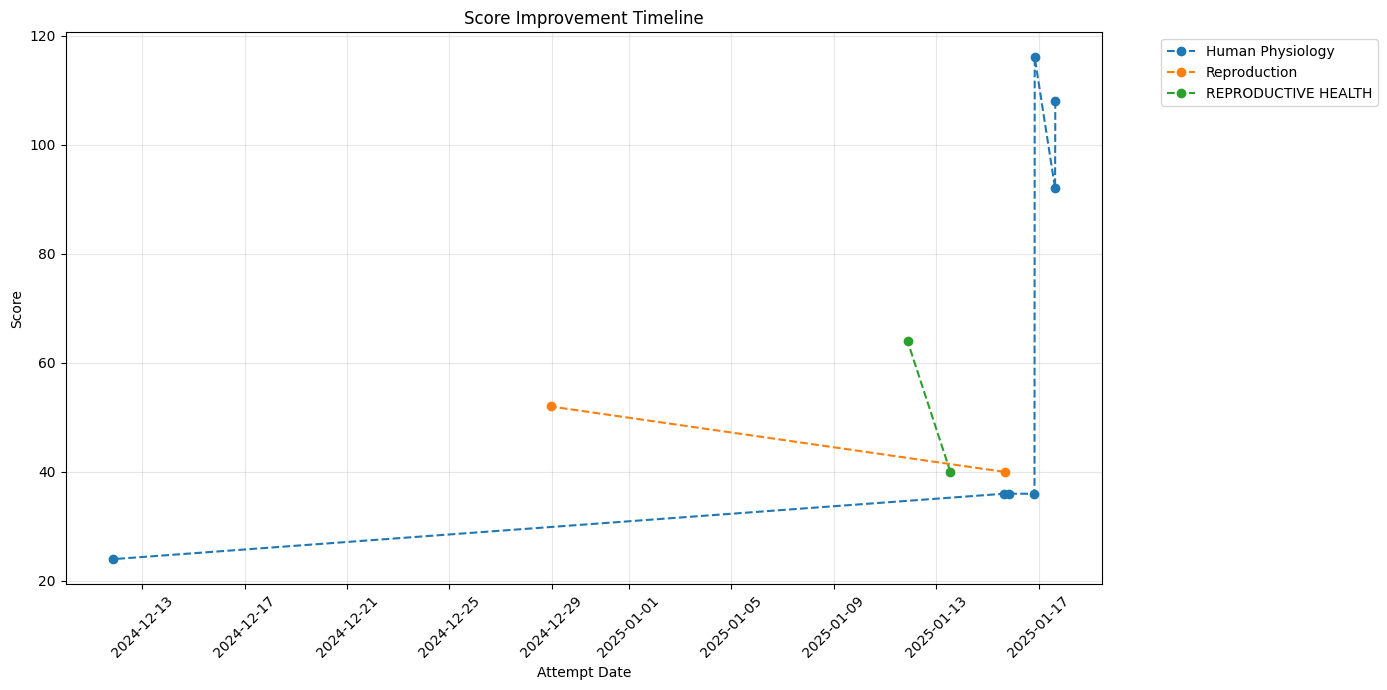

In [ ]:
import pandas as pd
import ast
import matplotlib.pyplot as plt

def parse_quiz(json_str):
    """Clean and standardize quiz titles from JSON data"""
    try:
        quiz_data = ast.literal_eval(json_str.replace("'", '"'))
        raw_title = quiz_data.get('title', 'Unknown')
        # Standardize title format
        title = raw_title.replace(' PYQ', '').split(' (')[0].strip()
        return title
    except (SyntaxError, ValueError, AttributeError) as e:
        print(f"Error parsing quiz data: {e}")
        return 'Unknown'

def analyze_performance(df):
    """Main analysis function with proper column handling"""
    # Extract and clean titles
    df['clean_title'] = df['quiz'].apply(parse_quiz)

    # Clean numeric columns
    numeric_cols = ['score', 'accuracy', 'speed', 'negative_score']
    for col in numeric_cols:
        df[col] = pd.to_numeric(df[col].astype(str).str.replace('[%,]', '', regex=True), errors='coerce')

    # Convert datetime
    df['submitted_at'] = pd.to_datetime(df['submitted_at'], format='%Y-%m-%dT%H:%M:%S.%f%z')

    # Group by cleaned titles
    analysis = df.groupby('clean_title').agg(
        attempts=('id', 'count'),
        avg_score=('score', 'mean'),
        min_score=('score', 'min'),
        max_score=('score', 'max'),
        score_improvement= ('score', lambda x: x.iloc[0] - x.iloc[-1] if len(x) > 1 else 0),
        accuracy=('accuracy', 'mean'),
        speed=('speed', 'mean'),
        negative_impact=('negative_score', 'mean')
    ).reset_index().round(2)

    return analysis

def plot_improvement(df):
    """Visualization function with proper title handling"""
    plt.figure(figsize=(14, 7))

    # Filter topics with multiple attempts
    valid_topics = df.groupby('clean_title').filter(lambda x: len(x) > 1)

    for title in valid_topics['clean_title'].unique():
        subset = df[df['clean_title'] == title]
        plt.plot(subset['submitted_at'], subset['score'],
                marker='o', linestyle='--', label=title)

    plt.title('Score Improvement Timeline')
    plt.xlabel('Attempt Date')
    plt.ylabel('Score')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True, alpha=0.3)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Main execution flow
df = pd.read_csv('historical_data.csv')
analysis = analyze_performance(df)

print("📊 Performance Analysis:")
print(analysis[['clean_title', 'avg_score', 'accuracy', 'score_improvement']].to_markdown(index=False))

plot_improvement(df)
